>### 🚩 *Create a free WhyLabs account to complete this example!*<br> 
>*Did you know you can store, visualize, and monitor whylogs profiles with the [WhyLabs Observability Platform](https://whylabs.ai/whylabs-free-sign-up?utm_source=github&utm_medium=referral&utm_campaign=langkit)? Sign up for a [free WhyLabs account](https://whylabs.ai/whylogs-free-signup?utm_source=github&utm_medium=referral&utm_campaign=LLM_to_WhyLabs) to leverage the power of whylogs and WhyLabs together!*

# Writing Profiles to WhyLabs

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/whylabs/LanguageToolkit/blob/main/langkit/examples/LLM_to_WhyLabs.ipynb)

In this example, we'll show how to send your LLM metrics to your monitoring dashboard at WhyLabs Platform.
We will:

- Define environment variables with the appropriate Credentials and IDs
- Log LLM prompts and responses into a profile
- Use a whylogs telemetry agent to gather statistics on the prompts/response and send these to WhyLabs
- View the systematic telemetry on your LLM in WhyLabs.

> Don't want to bother with setting up your credentials or running live LLM interactions? We've already done it for you and uploaded LangKit telemetry from prompt/response LLM interactions to a public guest session in WhyLabs, no login required you can just click [here](https://hub.whylabsapp.com/resources/demo-llm-chatbot/columns/prompt.sentiment_nltk?dateRange=2023-06-08-to-2023-06-09&sortModelBy=LatestAlert&sortModelDirection=DESC&targetOrgId=demo&sessionToken=session-8gcsnbVy)

## Installing LangKit

First, let's install __langkit__. 

In [1]:
# Note: you may need to restart the kernel to use updated packages.
%pip install langkit[all] -q

## ✔️ Setting the Environment Variables

In order to send our profile to WhyLabs, let's first set up an account. You can skip this if you already have an account and a model set up.

We will need three pieces of information:

- API tokens for the LLM and WhyLabs
- Organization ID for WhyLabs
- Dataset ID for WhyLabs

Go to [https://whylabs.ai/free](https://whylabs.ai/whylabs-free-sign-up?utm_source=github&utm_medium=referral&utm_campaign=langkit) and grab a free account. You can follow along with the examples if you wish, but if you’re interested in only following this demonstration, you can go ahead and skip the quick start instructions.

After that, you’ll be prompted to create an API token. Once you create it, copy and store it locally. The second important information here is your org ID. Take note of it as well. After you get your API Token and Org ID, you can go to https://hub.whylabsapp.com/models to see your projects dashboard. You can create a new project and take note of it's ID (if it's a model project it will look like `model-xxxx`).

We'll now check if the required credentials are set as environment variables. In a production setting these would already be set as environment variables, but here we prompt you if they are missing. You can still run the example without these, but we won't use a live session with GPT.

In [ ]:
from langkit.config import check_or_prompt_for_api_keys
from langkit.openai import ChatLog, send_prompt

check_or_prompt_for_api_keys()

## 📊 Profiling the Data

For demonstration, let's use some archived chat gpt response/prompts data from Hugging Face, or you can set the interactive parameter to true and interact with ChatGPT to see how it works in real time if you already have an openai api key.

In [ ]:
import os
from langkit.whylogs.rolling_logger import RollingLogger

telemetry_agent = RollingLogger()

INTERACTIVE = bool(os.getenv("OPENAI_API_KEY")) # set to True to test out interacting with ChatGPT
interactive_prompt = ""
if INTERACTIVE:
    print(f"At any time input 'q' or anything that begins with q to quit. enter a question for the LLM")
    while True:
        print()
        interactive_prompt = input("ask chat gpt: ")
        if interactive_prompt.startswith('q'):
            break
        response = send_prompt(interactive_prompt)
        # use the agent to log a dictionary, these should be flat
        # to get the best results, in this case we log the prompt and response text
        telemetry_agent.log(response.to_dict())
        print(response.to_dict(), flush=True)
else:
    from datasets import load_dataset

    archived_chats = load_dataset('alespalla/chatbot_instruction_prompts', split="test", streaming=True)
    chats = iter(archived_chats)
    for _ in range(100):
      response = next(chats)
      telemetry_agent.log(response)
      print(response)
    print("done profiling")

In [7]:
# In practice you can use context manager lifecycle events to automatically close
# loggers, this helps trigger a write ahead of schedule to avoid truncating the last interval
# data seen by the agent.
telemetry_agent.close()

## 🔍 A Look on the Other Side

Now, check your dashboard to verify everything went ok. At the __Profile__ tab, you should see something like this: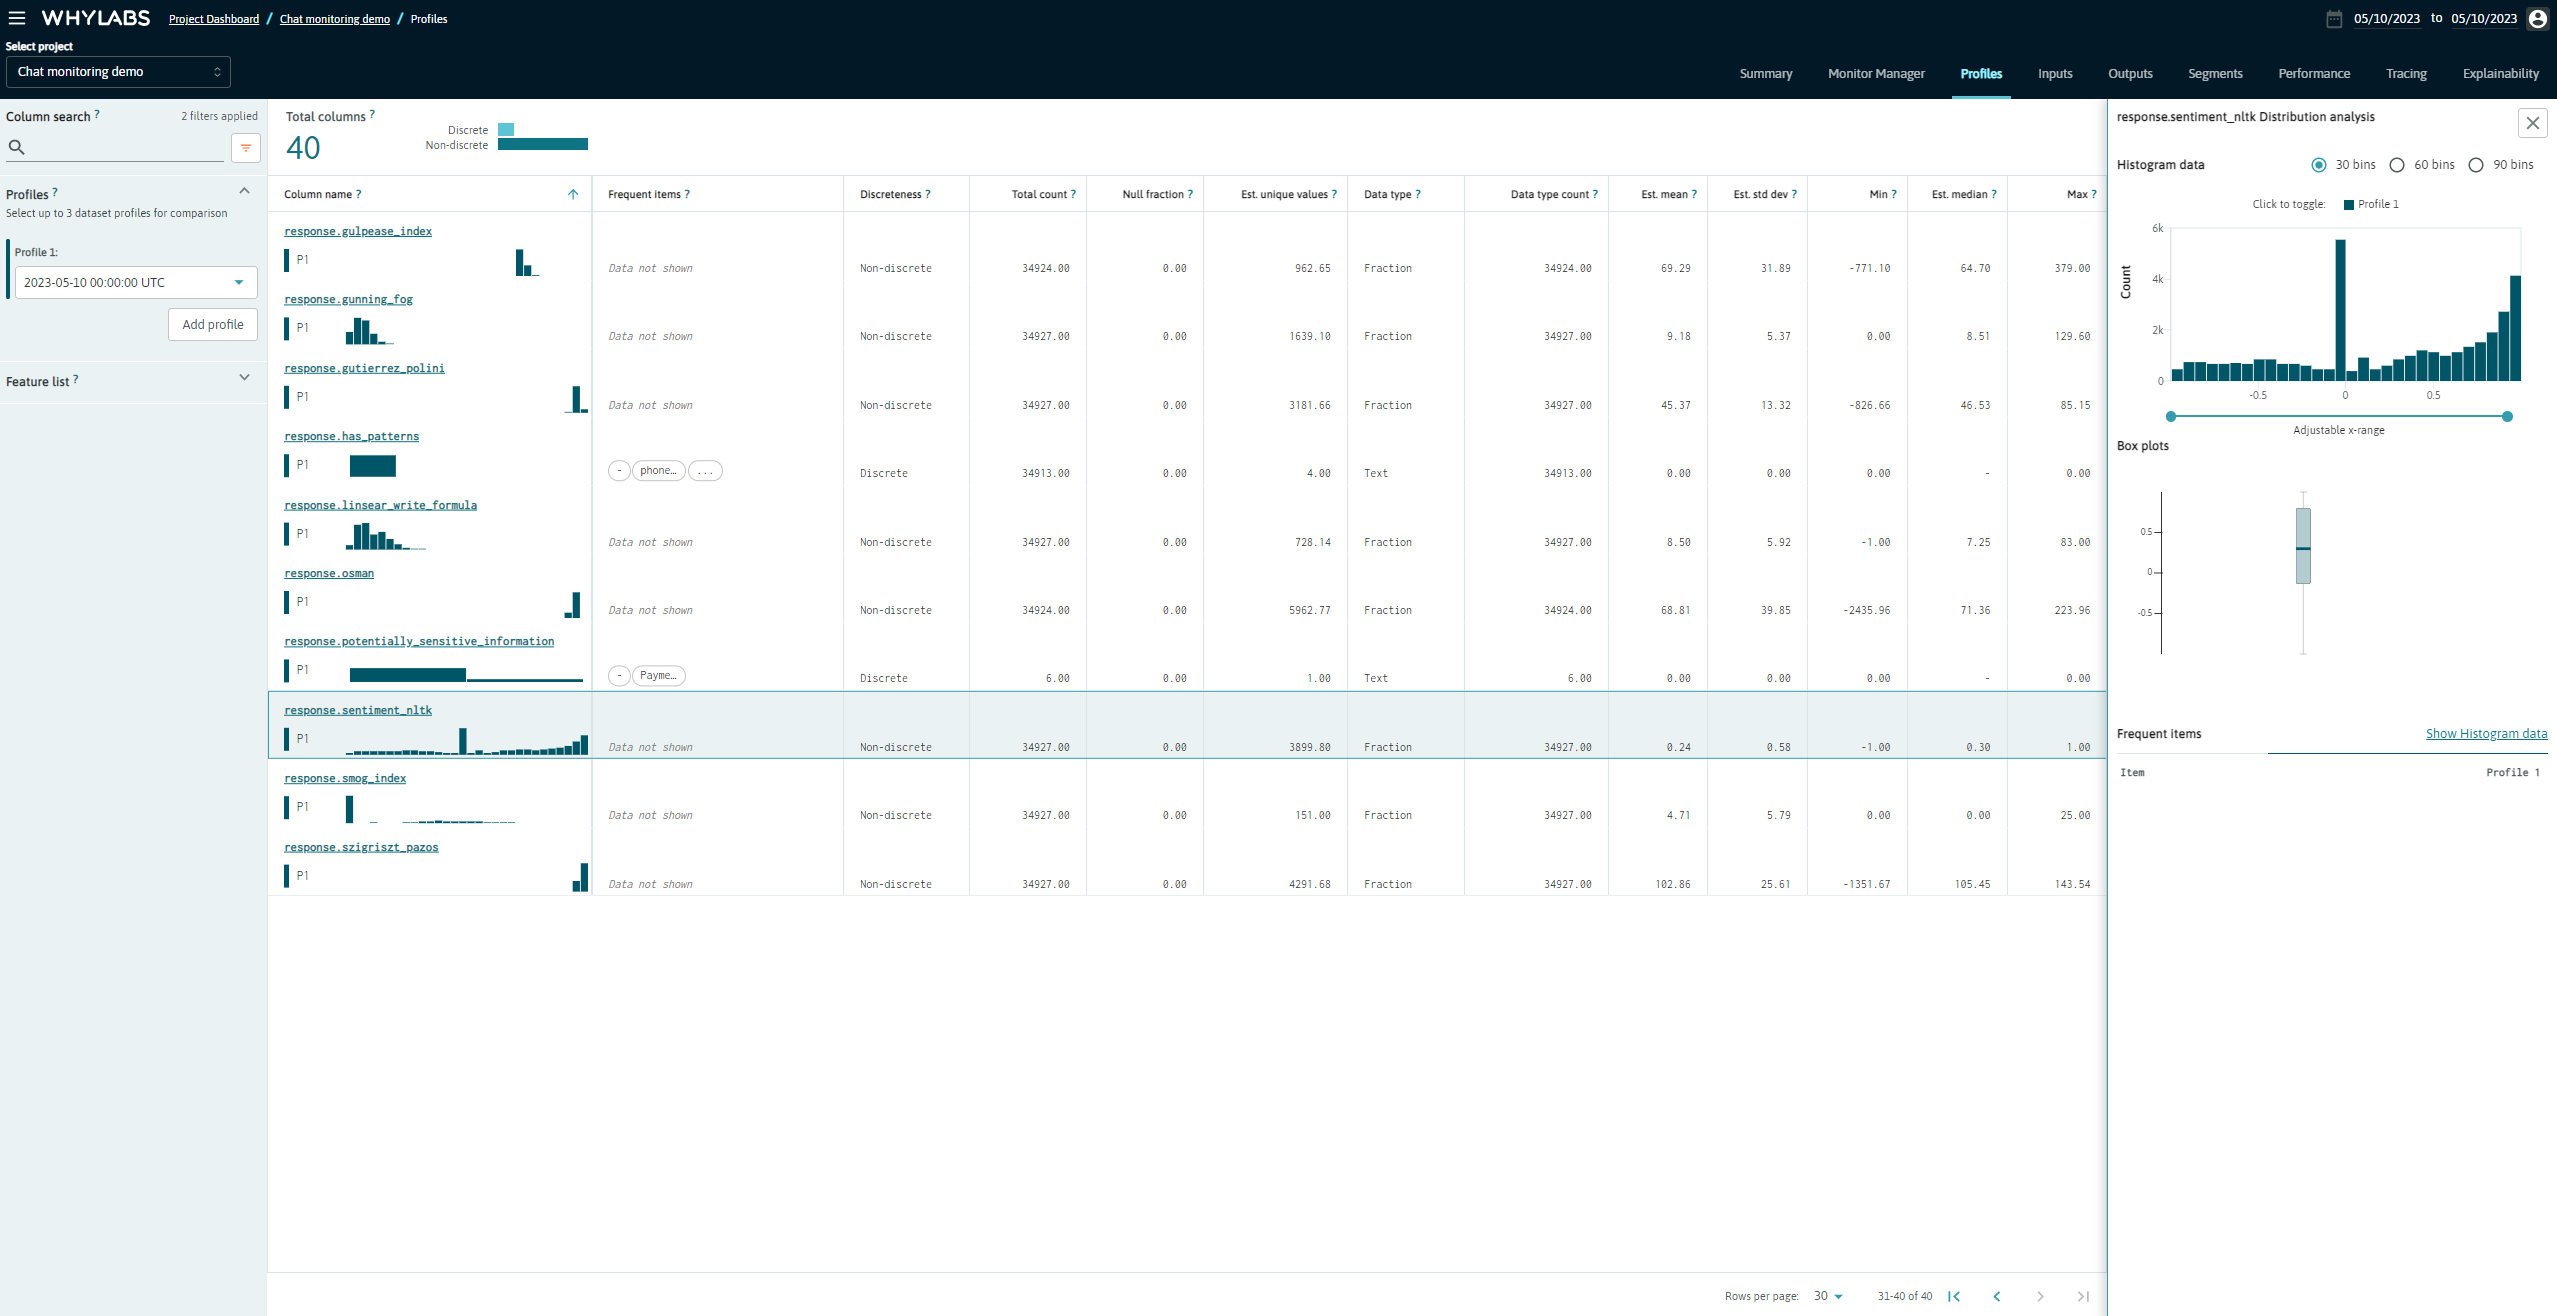

This should give you a quick way to look at how your extracted metrics on the text prompts and responses, and these can be monitored over time!